In [311]:
import pickle
import sncosmo
import numpy as np
import lsst.daf.base as dafBase
import lsst.daf.persistence as dafPersist

import lsst.afw.display.ds9 as ds9

import astropy.coordinates as coord
import astropy.units as u

In [336]:
from astropy.table import Table

def source_distance(src1, src2):
    ra, dec = src1['ra'], src1['dec']
    ra2, dec2 = src2['ra'], src2['dec']
            
    return np.sqrt((float(ra)-float(ra2))**2+(float(dec)-float(dec2))**2)/3.14159*180*3600

def build_light_curve_from_snls_file(data):

    bandpasses = ['r']


    lightcurve = {}
    lightcurve['bandpass'] = []
    lightcurve['mjd'] = []
    #lightcurve['ra'] = []
    #lightcurve['dec'] = []
    lightcurve['flux'] = []
    lightcurve['flux_error'] = []
    lightcurve['zp'] = []
    lightcurve['zpsys'] = []


    for mjd, flux, error in data:

        #print 'yep',visit
        lightcurve['bandpass'].append(str('sdss' + bandpasses[0]))
        lightcurve['mjd'].append(float(mjd))
        #lightcurve['ra'].append(src['coord_ra'])
        #lightcurve['dec'].append(src['coord_dec'])
        lightcurve['flux'].append(float(flux))
        lightcurve['flux_error'].append(float(error))
        #lightcurve['flux'].append(src['base_CircularApertureFlux_12_0_flux'])
        #lightcurve['flux_error'].append(src['base_CircularApertureFlux_12_0_fluxSigma'])
        lightcurve['zp'].append(25.0)
        lightcurve['zpsys'].append('ab')

    lc = Table(data=lightcurve)
    return lc

def mean_lc_flux(lc2):
    mjds = []
    m_fluxes = []
    m_error = []
    s_error = []
    i = 0
    while i < len(lc2['mjd']):
        mjd = lc2['mjd'][i]
        j = i+1
        mjds.append(int(mjd))
        m_fluxes.append(lc2['flux'][i])
        m_error.append(lc2['flux_error'][i])
        s_error.append(lc2['flux_error'][i]*lc2['flux_error'][i])
        total = 1.

        while j<len(lc2['mjd']) and int(lc2['mjd'][j]) == int(mjd):

            m_fluxes[-1]+= lc2['flux'][j]*lc2['flux_error'][j]
            m_error[-1] += lc2['flux_error'][j]
            s_error[-1] += (lc2['flux_error'][j]*lc2['flux_error'][j])
            #mjds[-1] += int(lc2['mjd'][j])
            total+=1
            j+=1
        m_fluxes[-1] = np.divide(m_fluxes[-1], m_error[-1] )
        m_error[-1] = np.divide(np.sqrt(s_error[-1]), total)
        i = j
    return mjds, m_fluxes, m_error

def build_lightcurve(source_list):
    """
    Assemble a light curve data table from available files.
    """

    bandpasses = ['r']


    lightcurve = {}
    lightcurve['bandpass'] = []
    lightcurve['mjd'] = []
    lightcurve['ra'] = []
    lightcurve['dec'] = []
    lightcurve['flux'] = []
    lightcurve['flux_error'] = []
    lightcurve['zp'] = []
    lightcurve['zpsys'] = []
    lightcurve['visits'] = []

    for visit, src in source_list:

        #print 'yep',visit
        lightcurve['bandpass'].append(str('sdss' + bandpasses[0]))
        lightcurve['mjd'].append(visit[-1])
        lightcurve['ra'].append(src['coord_ra'])
        lightcurve['dec'].append(src['coord_dec'])
        lightcurve['flux'].append(src['base_PeakLikelihoodFlux_flux'])
        lightcurve['flux_error'].append(src['base_PeakLikelihoodFlux_fluxSigma'])
        lightcurve['visits'].append(visit)
        #lightcurve['flux'].append(src['base_CircularApertureFlux_12_0_flux'])
        #lightcurve['flux_error'].append(src['base_CircularApertureFlux_12_0_fluxSigma'])
        lightcurve['zp'].append(25.0)
        lightcurve['zpsys'].append('ab')
    lightcurve = Table(data=lightcurve)
    return lightcurve


In [312]:
lcs = pickle.load(open('/renoir_data_02/jpreyes/lsst_data/transients.lc', 'rb'))


print "there are " +str(len(lcs)) +" light curves"

there are 1148 light curves


In [313]:
i=1
DATADIR="/renoir_data_02/jpreyes/lsst_data/CFHTLS_master/"
butler = dafPersist.Butler(DATADIR+"/output")
cl = butler.get('calexp', {'visit': 850177 , 'filter':'r' , 'ccd':14})
    
wcs = cl.getWcs()
ds9.mtv(cl, frame=1)
for n, tl in enumerate(lcs):
   

    x, y = wcs.skyToPixel(tl[0]['ra'], tl[0]['dec'])
    #ds9.dot(n, x, y, frame=1, size=2)
    ds9.dot('o', x, y, frame=1, size=10, ctype=ds9.BLUE)
    i+=1
    

In [314]:
import re
f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table9.dat.txt','r')
data_elems = f.read()
#m = re.findall('^06D3.*?\\|(.*?)\\|', data, re.MULTILINE)
elems = re.findall('^(06D3.*?)\\|(.*?)\\|', data_elems, re.MULTILINE)

In [266]:
import lsst.afw.geom as afwGeom
for sn in elems:
    c = coord.SkyCoord(sn[-1], unit=(u.hourangle, u.deg))
    
    try:
        x, y = wcs.skyToPixel(afwGeom.Angle(c.ra.degree, afwGeom.degrees), afwGeom.Angle(c.dec.degree, afwGeom.degrees))

        ds9.dot('o', x, y, frame=1, size=25, ctype= ds9.RED)
        i+=1
    except Exception, e:
        print e

06D3bz


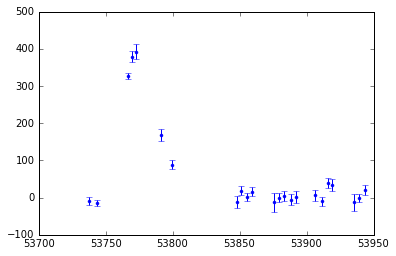

06D3cb


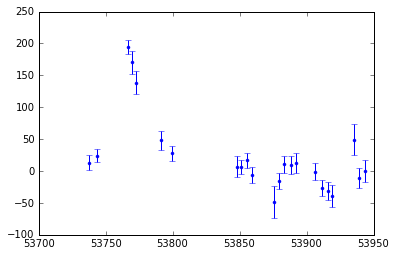

06D3cc


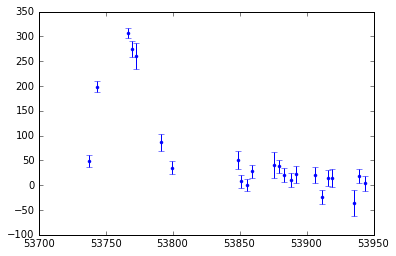

06D3cn


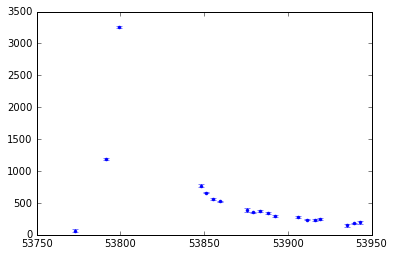

06D3df


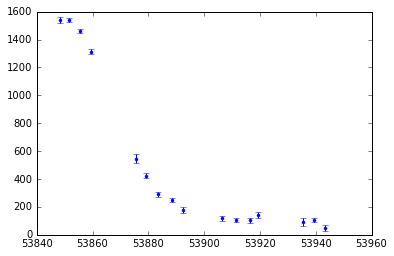

06D3dl


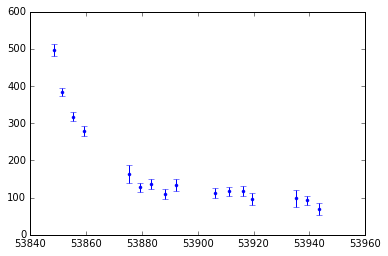

06D3do


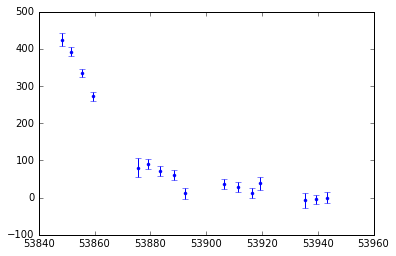

06D3dt


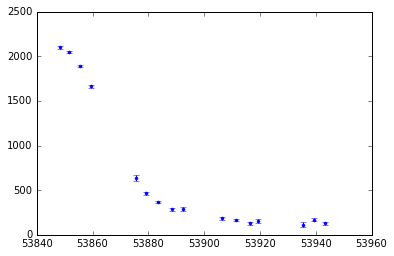

06D3ed


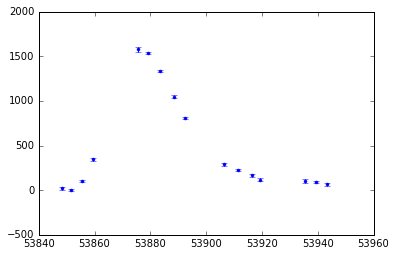

06D3el


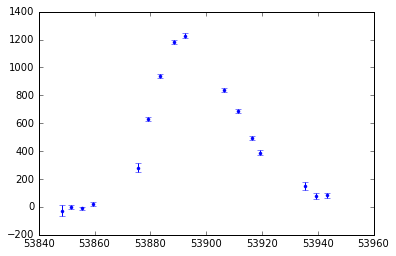

06D3em


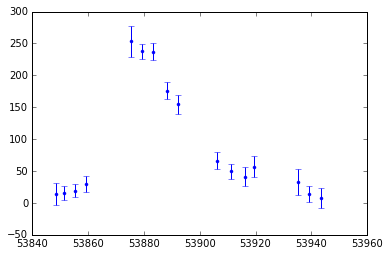

06D3en


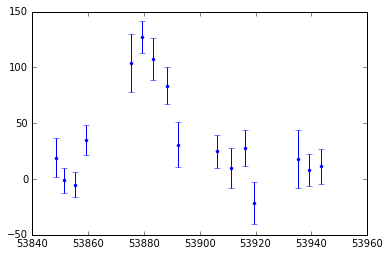

06D3et


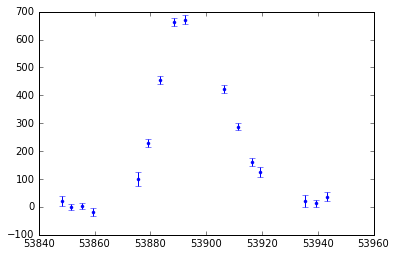

06D3fp


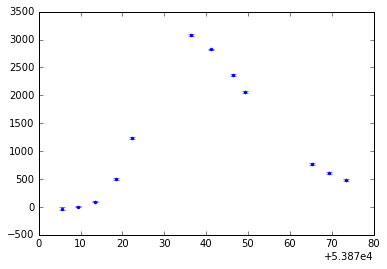

06D3gh


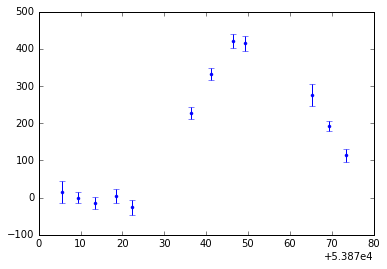

06D3gn


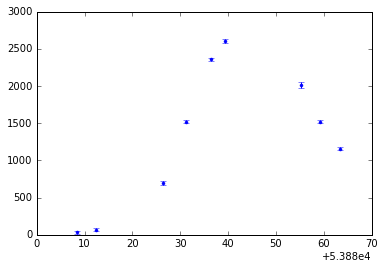

06D3gx


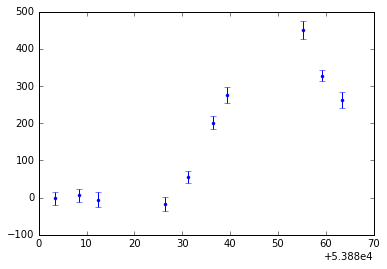

In [260]:
for sn in elems:

    m = re.findall('^'+str(sn[0])+'\\|r\\|(.*?)\\|(.*?)\\|(.*?)$', data, re.MULTILINE)
    print sn[0]
    snls_lc = build_light_curve_from_snls_file(m)
    plt.errorbar(snls_lc['mjd'], snls_lc['flux'], yerr=snls_lc['flux_error'], fmt='.', color='blue')
    plt.show()

In [328]:
matches = []
for sn in elems:
    match = False
    c = coord.SkyCoord(sn[-1], unit=(u.hourangle, u.deg))
    
    
    for i, lc in enumerate(lcs):
        #print lc[0]['ra']
        #print lc[0]['dec']
        if source_distance(lc[0], {'ra':c.ra.radian, 'dec':c.dec.radian}) < 2:
            match = True
 
            matches.append((sn[0], i))
            break
    
        #print 'no match'
print 'found ' + str(float(len(matches))/float(len(elems))) 

found 0.705882352941


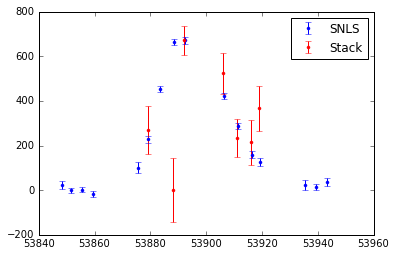

In [441]:
match = matches[9]
m = re.findall('^'+str(match[0])+'\\|r\\|(.*?)\\|(.*?)\\|(.*?)$', data, re.MULTILINE)

snls_lc = build_light_curve_from_snls_file(m)
plt.errorbar(snls_lc['mjd'], snls_lc['flux'], yerr=snls_lc['flux_error'], fmt='.', color='blue', label='SNLS')



lc = lcs[match[-1]]  
lc_copy = lc.copy()
lc_copy.remove_row(-1)


#print lc, lc_copy
m_mjd, m_f, m_e = mean_lc_flux(lc_copy)

factor = max(snls_lc['flux']) / max(m_f)
f_mf = np.multiply(m_f, factor)
f_me = np.multiply(m_e, factor)

plt.errorbar(m_mjd, f_mf, yerr=f_me, fmt='.', color='red', label='Stack')
plt.legend(numpoints=1)
plt.show()

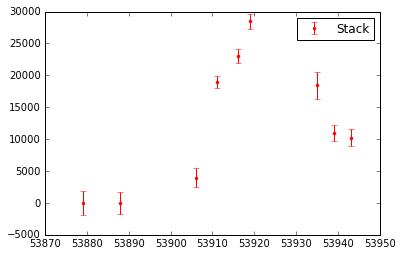

In [444]:
match = matches[-1]
m = re.findall('^'+str(match[0])+'\\|r\\|(.*?)\\|(.*?)\\|(.*?)$', data, re.MULTILINE)

snls_lc = build_light_curve_from_snls_file(m)


#f = plt.errorbar(snls_lc['mjd'], snls_lc['flux'], yerr=snls_lc['flux_error'], fmt='.', color='blue', label='SNLS')
 


lc = lcs[match[-1]]  
lc_copy = lc.copy()
lc_copy.remove_row(0)


#print lc, lc_copy
m_mjd, m_f, m_e = mean_lc_flux(lc_copy)

#factor = max(snls_lc['flux']) / max(m_f)
#f_mf = np.multiply(m_f, factor)
#f_me = np.multiply(m_e, factor)

p = plt.errorbar(m_mjd, m_f, yerr=m_e, fmt='.', color='red', label='Stack')

ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

plt.legend(numpoints=1)

plt.show()

     mjd              visits [2]        zpsys ...     dec       zp  bandpass
------------- ------------------------- ----- ... ------------ ---- --------
53875.4951733 849373.0 .. 53875.4951733    ab ... 0.920775 rad 25.0    sdssr
53875.4992327 849374.0 .. 53875.4992327    ab ... 0.920775 rad 25.0    sdssr
53875.5033071 849375.0 .. 53875.5033071    ab ... 0.920774 rad 25.0    sdssr
53879.2821085 849686.0 .. 53879.2821085    ab ... 0.920774 rad 25.0    sdssr
53879.2861765 849687.0 .. 53879.2861765    ab ... 0.920775 rad 25.0    sdssr
53879.2902515 849688.0 .. 53879.2902515    ab ... 0.920775 rad 25.0    sdssr
53883.3670842 850179.0 .. 53883.3670842    ab ... 0.920775 rad 25.0    sdssr
53888.3757951 850586.0 .. 53888.3757951    ab ... 0.920775 rad 25.0    sdssr
53888.3842784 850588.0 .. 53888.3842784    ab ... 0.920775 rad 25.0    sdssr
53892.3464053 851057.0 .. 53892.3464053    ab ... 0.920775 rad 25.0    sdssr
          ...                       ...   ... ...          ...  ...      ...

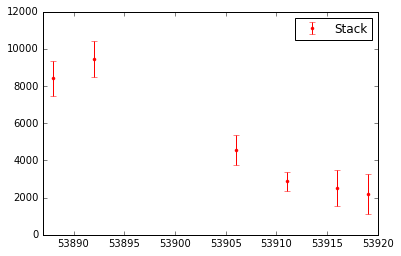

In [463]:
match = matches[6]
m = re.findall('^'+str(match[0])+'\\|r\\|(.*?)\\|(.*?)\\|(.*?)$', data, re.MULTILINE)

snls_lc = build_light_curve_from_snls_file(m)


#f = plt.errorbar(snls_lc['mjd'], snls_lc['flux'], yerr=snls_lc['flux_error'], fmt='.', color='blue', label='SNLS')
 


lc = lcs[match[-1]]  
lc_copy = lc.copy()
lc_copy.remove_row(6)
lc_copy.remove_row(0)
lc_copy.remove_row(0)
lc_copy.remove_row(0)
lc_copy.remove_row(0)
lc_copy.remove_row(0)
lc_copy.remove_row(0)
lc_copy.remove_row(-1)
lc_copy.remove_row(-1)



print lc, lc_copy
m_mjd, m_f, m_e = mean_lc_flux(lc_copy)

#factor = max(snls_lc['flux']) / max(m_f)
#f_mf = np.multiply(m_f, factor)
#f_me = np.multiply(m_e, factor)

p = plt.errorbar(m_mjd, m_f, yerr=m_e, fmt='.', color='red', label='Stack')

ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xlim(xmin=min(m_mjd)-1)
plt.legend(numpoints=1)

plt.show()

06D3bz


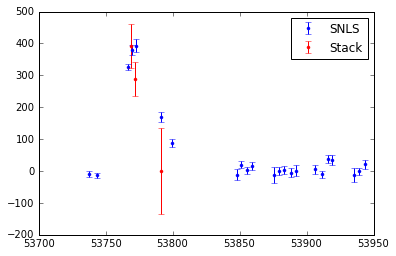

06D3cn


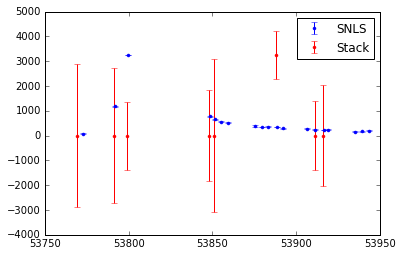

06D3df


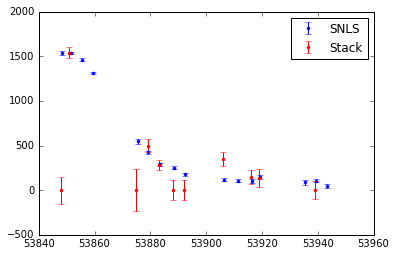

06D3dl


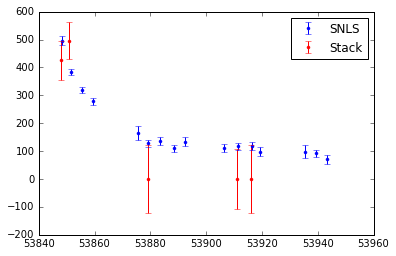

06D3do


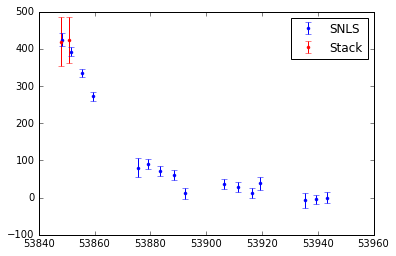

06D3dt


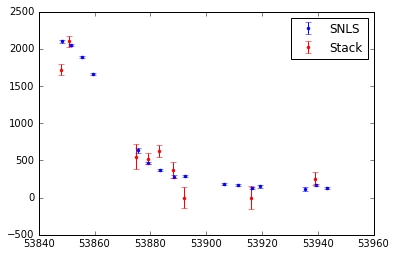

06D3ed


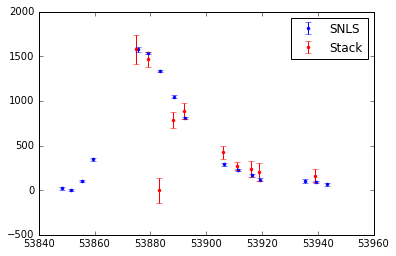

06D3el


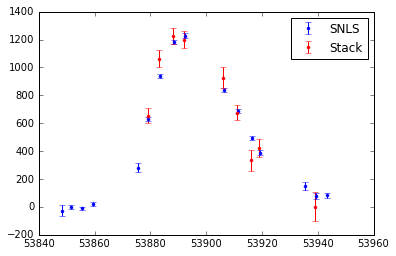

06D3em


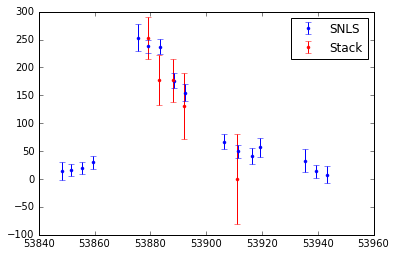

06D3et


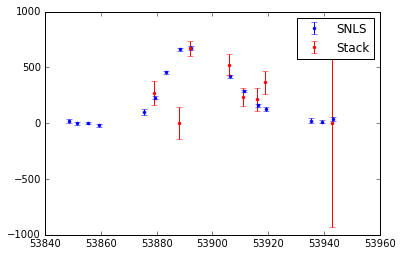

06D3fp


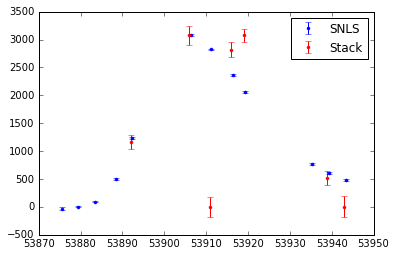

06D3gn


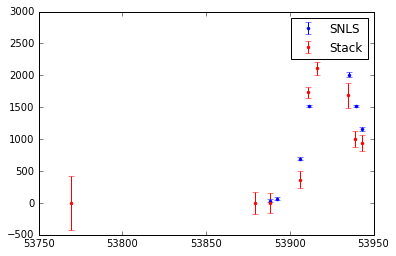

In [442]:
f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table10.dat.txt','r')
data = f.read()
snls_light_curves = []

for match in matches:
    print match[0]
    m = re.findall('^'+str(match[0])+'\\|r\\|(.*?)\\|(.*?)\\|(.*?)$', data, re.MULTILINE)
   
    snls_lc = build_light_curve_from_snls_file(m)
    plt.errorbar(snls_lc['mjd'], snls_lc['flux'], yerr=snls_lc['flux_error'], fmt='.', color='blue', label='SNLS')
    
    
    
    lc = lcs[match[-1]]   
    m_mjd, m_f, m_e = mean_lc_flux(lc)
    
    factor = max(snls_lc['flux']) / max(m_f)
    f_mf = np.multiply(m_f, factor)
    f_me = np.multiply(m_e, factor)
    
    plt.errorbar(m_mjd, f_mf, yerr=f_me, fmt='.', color='red', label='Stack')
    plt.xticks
    
    ax = plt.gca()
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    plt.legend(numpoints=1)
    plt.show()

In [318]:
detected = []
not_detected = []
nd_coords = []
for elem in elems:
    found = False
    m = re.findall('^'+str(elem[0])+'\\|(.*?)\\|.*?\\|.*?\\|.*?\\|.*?\\|(.*?)\\|.*?$', data_elems, re.MULTILINE)
   
    for match in matches:
        if match[0] == elem[0]:
            detected.append(float(m[0][-1]))
            found = True
            break
    if found == False:
        not_detected.append(float(m[0][-1]))
        nd_coords.append(m[0][0])
     

In [319]:
print len(detected) + len(not_detected)

17


In [427]:
detected

[0.727,
 0.232,
 0.442,
 0.357,
 0.726,
 0.282,
 0.404,
 0.519,
 0.69,
 0.576,
 0.268,
 0.25]

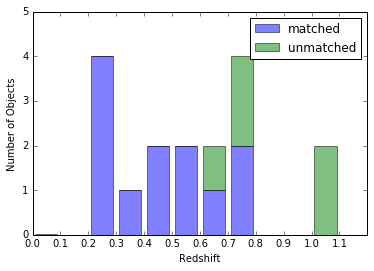

In [435]:

1.1/0.1
binwidth = 0.1
#plt.hist(detected, bins=np.arange(0.0,1.1+binwidth,binwidth), alpha=0.5, label="matched", stacked=True)
plt.hist([detected, not_detected], bins=np.arange(0.0,1.1+binwidth,binwidth), alpha=0.5, label=['matched','unmatched'], stacked=True)
plt.xticks(np.arange(0.0, 1.2, 0.1))
plt.yticks(np.arange(0, 6, 1))
plt.ylabel('Number of Objects')
plt.xlabel('Redshift')
#plt.xlim(xmin=0, xmax=1.1)
plt.legend(loc='upper right')
plt.show()

In [321]:
def get_diaSources_on_field(butler, visit, ccds, s_threshold=5):
    field_diaSources = []

    visit_catalog = None
    mjd = -1
    for ccd in ccds:

        if butler.datasetExists("deepDiff_differenceExp", {'visit': visit , 'filter':'r' , 'ccd':ccd}):

            diffExp = butler.get("deepDiff_differenceExp", {'visit': visit , 'filter':'r' , 'ccd':ccd})
            diaSrcs = butler.get("deepDiff_diaSrc", {'visit': visit , 'filter':'r' , 'ccd':ccd})
            #print "joining ccd "+ str(ccd) + " with " + str(len(diaSrcs)) + "sources"

            fluxes, sigmas = DSTools.get_fluxes_and_sigmas(diaSrcs, "base_PeakLikelihoodFlux_flux")

            m_sigma = np.mean(sigmas)
            t_sigma = s_threshold*m_sigma

            sources = DSTools.get_sources_over_sigma(diaSrcs, t_sigma, "base_PeakLikelihoodFlux_flux")
            #Here we add conditions on the DiaSources set (for instance, no diaSources with negative footprints)
            if visit_catalog == None:
                visit_catalog = diaSrcs.copy()
                visit_catalog.clear()


            for source in sources:
                 visit_catalog.addNew()
                 visit_catalog.append(source)

    #the catalog is complete
    #print "total field has " +str(len(visit_catalog)) +" sources"
    if visit_catalog is not None:
        mjd = float(diffExp.getMetadata().get("MJD-OBS"))
    return visit_catalog, mjd


In [322]:

dsrcs = butler.get('deepDiff_diaSrc', {'visit': 850177 , 'filter':'r' , 'ccd':14})


In [323]:
nd_ref = dsrcs.copy()
nd_ref.clear()
for nd in nd_coords:
    new_src = nd_ref.addNew()
    c = coord.SkyCoord(nd_coords[-1], unit=(u.hourangle, u.deg))
    new_src.setRa(afwGeom.Angle(c.ra.radian))
    new_src.setDec(afwGeom.Angle(c.dec.radian))
    nd_ref.append(new_src)
    

In [348]:
import DiaSourceTools as DSTools
import lsst.afw.table as afwTable

DATADIR="/renoir_data_02/jpreyes/lsst_data/CFHTLS_master/"
butler = dafPersist.Butler(DATADIR+"/output")
visits = butler.queryMetadata("deepDiff_differenceExp", format=['visit', 'date'],dataId={'filter':'r'})
ccds = butler.queryMetadata("deepDiff_differenceExp", format=['ccd'],dataId={'filter':'r'})


catalogs = []

#ccds = [14]
cat_matches = []
for visit, date in visits:
    #if date in dates:
    #   continue
    #We check if there is actually data for the given visit (due to butler limitations) and we chose the first visit for each date
    #if butler.datasetExists("deepDiff_differenceExp", {'visit': visit , 'filter':'r' , 'ccd':ccd}) and date not in dates:
        #print visit
    catalog = get_diaSources_on_field(butler, visit, ccds, s_threshold=1)
    if catalog[0] is not None:
        #print catalog, nd_ref
        cat_match = afwTable.matchRaDec(nd_ref, catalog[0], afwGeom.Angle(2./3600., afwGeom.degrees))
        catalogs.append(catalog)
        cat_matches.append((visit, cat_match))

In [362]:
print t_lc['mjd']

mjd
---
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
